In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import pacf,acf
import statsmodels

In [99]:
df = pd.read_csv('tute1.csv')

In [100]:
df = df.drop(columns=['AdBudget', 'GDP'])

In [101]:
df.head()

,Unnamed: 0,Sales
0,Mar-81,1020.2
1,Jun-81,889.2
2,Sep-81,795.0
3,Dec-81,1003.9
4,Mar-82,1057.7


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Unnamed: 0    100 non-null object
Sales         100 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [103]:
df.columns = ['date','sales']

In [104]:
year = []
month = []
for i in range(len(df)):
    month.append(df['date'][i].split('-')[0])
    
    if df['date'][i].split('-')[1][:-1] != '0':
        year.append('19'+ df['date'][i].split('-')[1])
    else:
        year.append('20'+ df['date'][i].split('-')[1])

df['date'] = pd.to_datetime(['{}-{}-01'.format(y,m) for y,m in zip(year,month)])

In [105]:
indexedDataset=df.set_index(['date'])

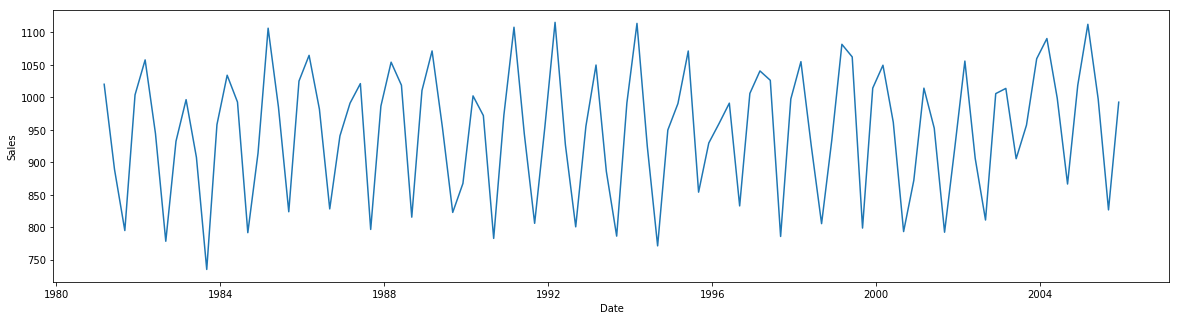

In [106]:
## plot graph
plt.figure(figsize=(20,5))

plt.xlabel("Date")
plt.ylabel("Sales")
plt.plot(indexedDataset)

In [107]:
#Determing rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

                 sales
date                  
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01         NaN
1982-03-01         NaN
...                ...
2004-12-01  974.175000
2005-03-01  978.891667
2005-06-01  986.491667
2005-09-01  987.791667
2005-12-01  986.691667

[100 rows x 1 columns]                 sales
date                 
1981-03-01        NaN
1981-06-01        NaN
1981-09-01        NaN
1981-12-01        NaN
1982-03-01        NaN
...               ...
2004-12-01  85.503494
2005-03-01  91.754212
2005-06-01  88.919038
2005-09-01  86.195617
2005-12-01  86.028975

[100 rows x 1 columns]


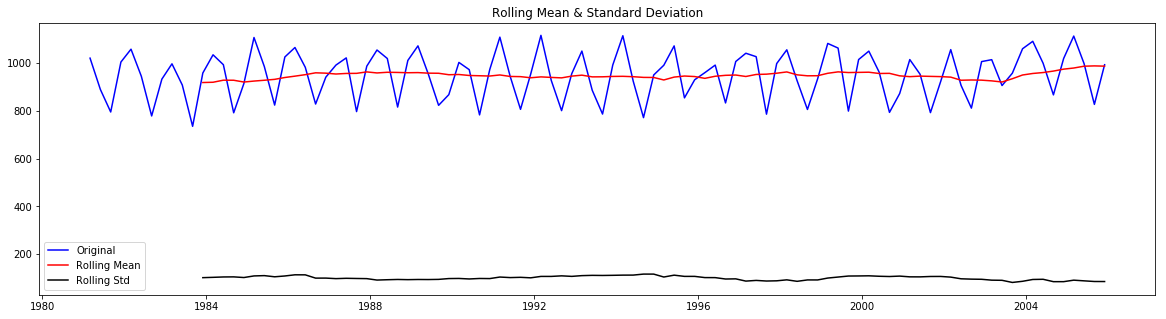

In [108]:
plt.figure(figsize=(20,5))

#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [109]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


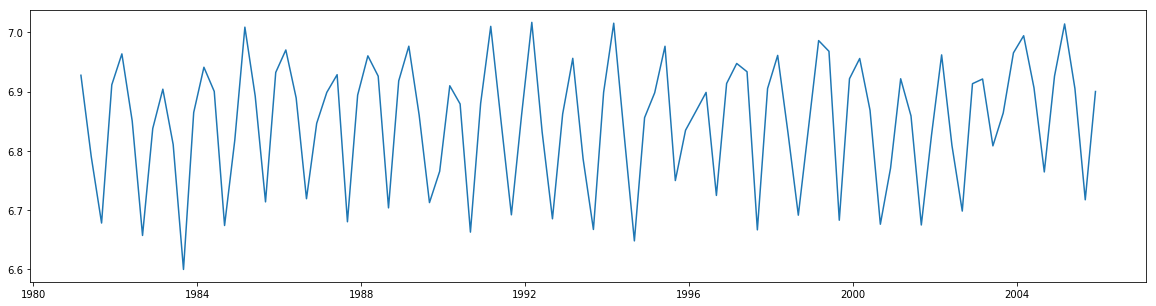

In [110]:
plt.figure(figsize=(20,5))

#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

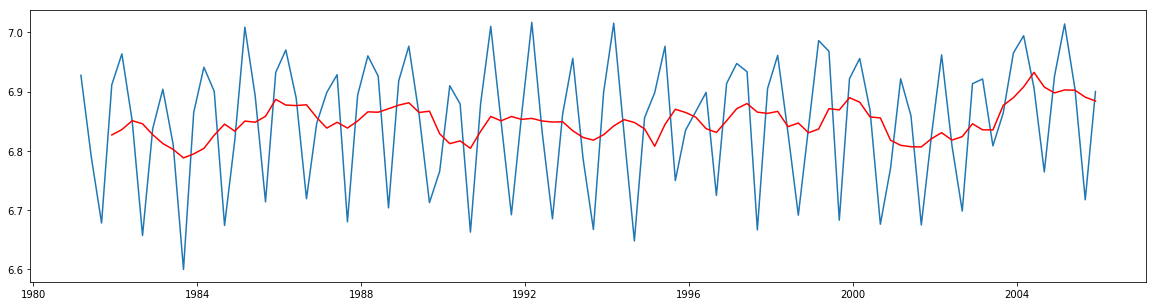

In [111]:
plt.figure(figsize=(20,5))

movingAverage = indexedDataset_logScale.rolling(window=4).mean()
movingSTD = indexedDataset_logScale.rolling(window=4).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [112]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

# Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,sales
date,
1981-12-01,0.084631
1982-03-01,0.127811
1982-06-01,-0.000548
1982-09-01,-0.188486
1982-12-01,0.010459
1983-03-01,0.091740
1983-06-01,0.008314
1983-09-01,-0.188253
1983-12-01,0.069922


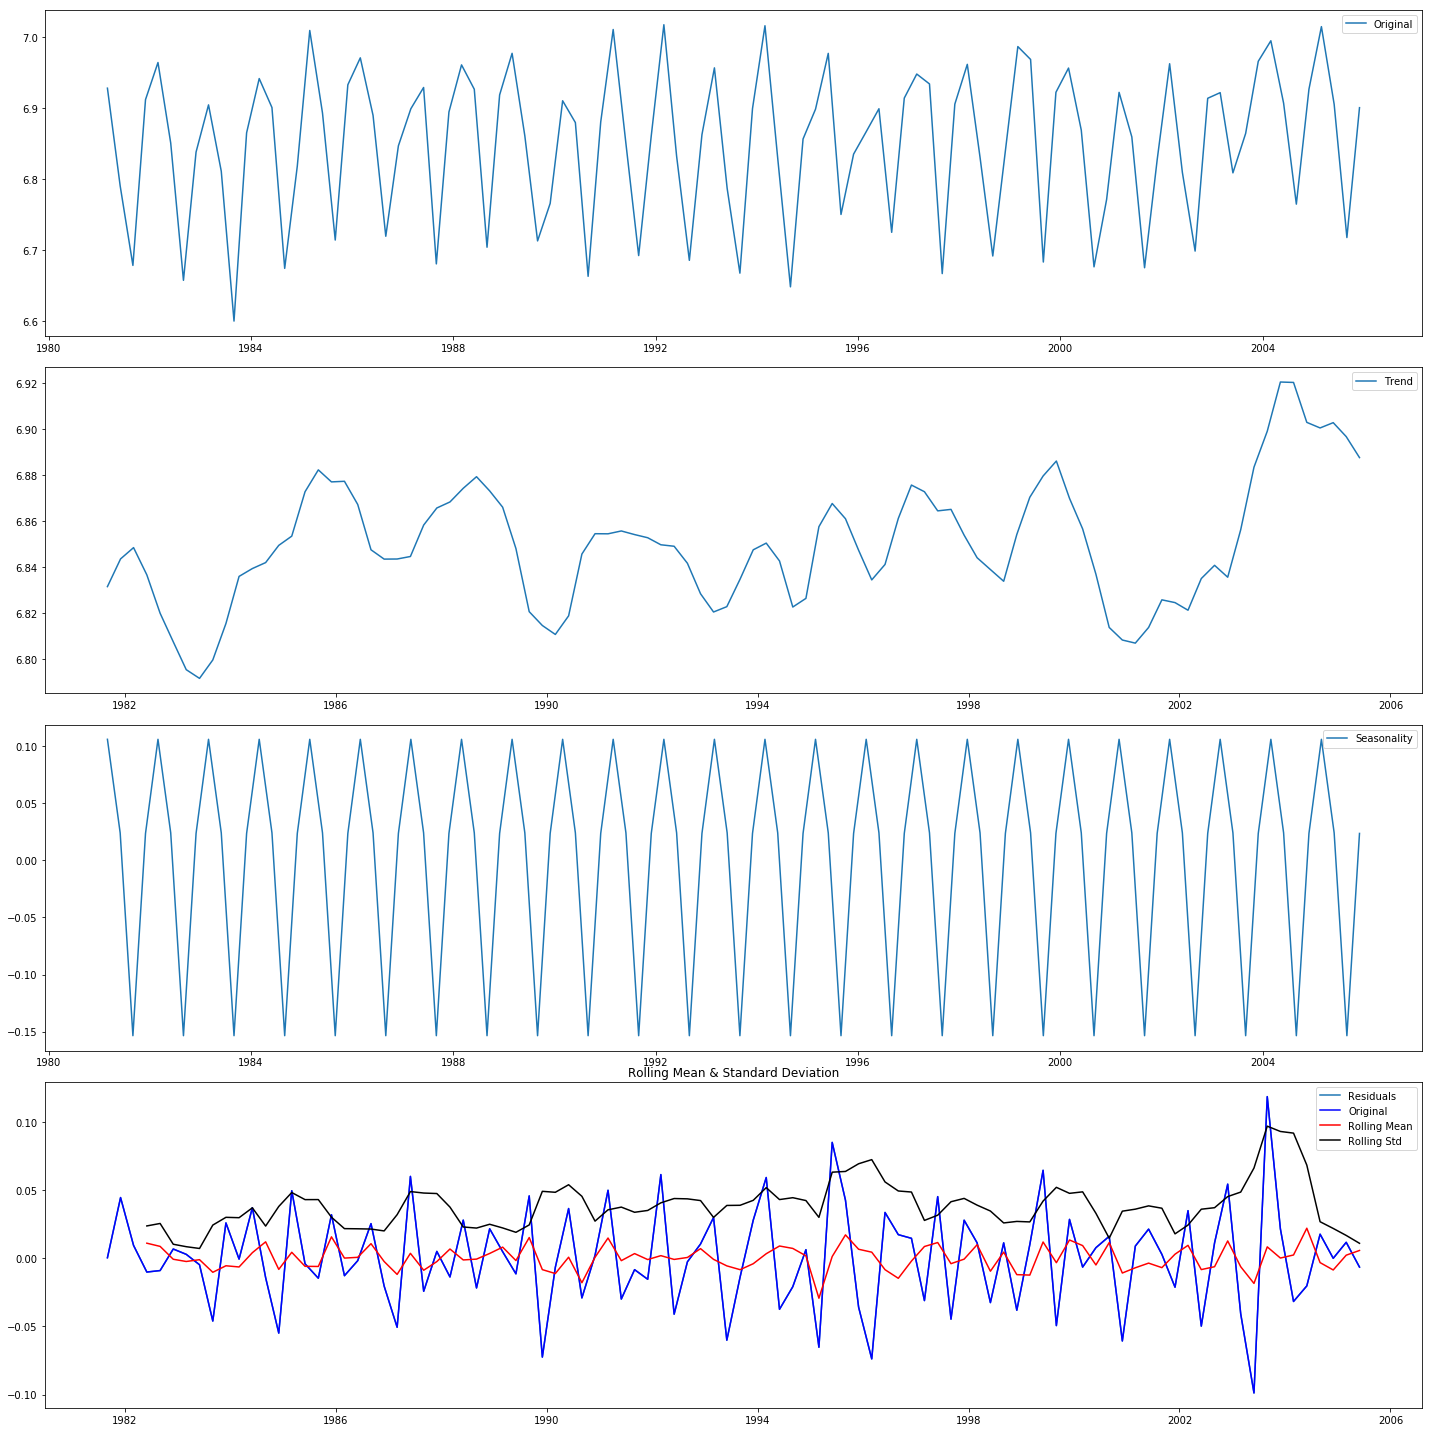

Result of Dickey-Fuller Test:
Test Statistic                -6.204835e+00
p-value                        5.690975e-08
#Lag Used                      8.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,20))

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [114]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
  #Determing rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
  
  #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
  
  #Perform Dickey-Fuller test:
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

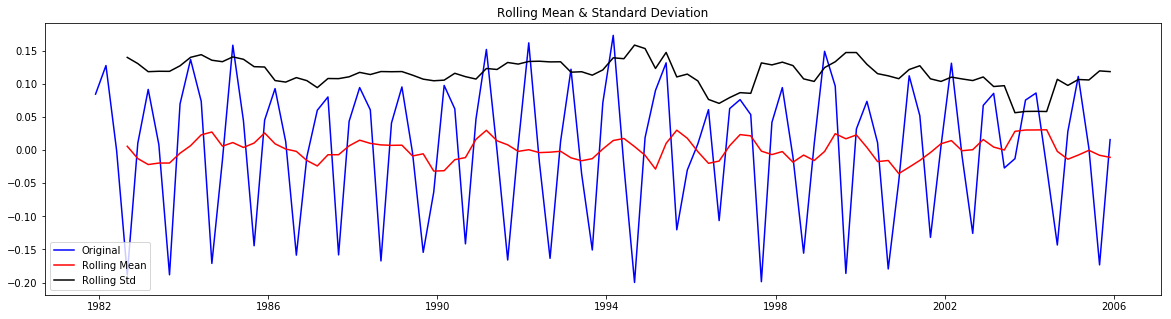

Result of Dickey-Fuller Test:
Test Statistic                 -4.747865
p-value                         0.000068
#Lag Used                       9.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [115]:
plt.figure(figsize=(20,5))

test_stationarity(datasetLogScaleMinusMovingAverage)

## PACF dan ACF

In [116]:
ar_pacf = statsmodels.tsa.stattools.pacf(datasetLogScaleMinusMovingAverage, nlags=20)
ar_acf = statsmodels.tsa.stattools.acf(datasetLogScaleMinusMovingAverage, nlags=20)

C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


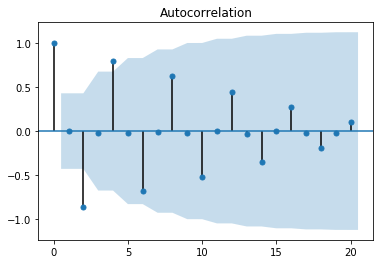

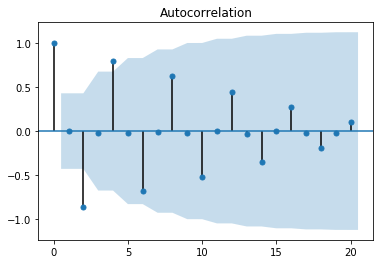

In [117]:
statsmodels.graphics.tsaplots.plot_acf(ar_acf,lags=20)

C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


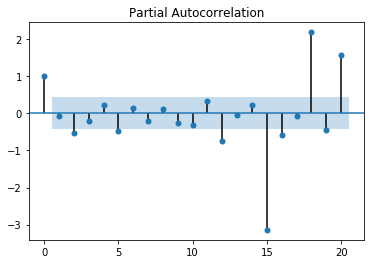

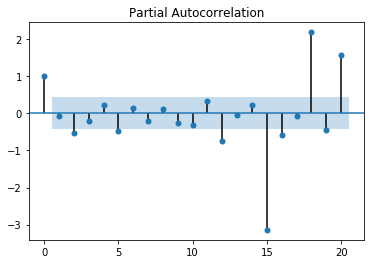

In [118]:
plt.figure(figsize=(20,5))

statsmodels.graphics.tsaplots.plot_pacf(ar_pacf,lags=20)

In [119]:
from pmdarima import auto_arima

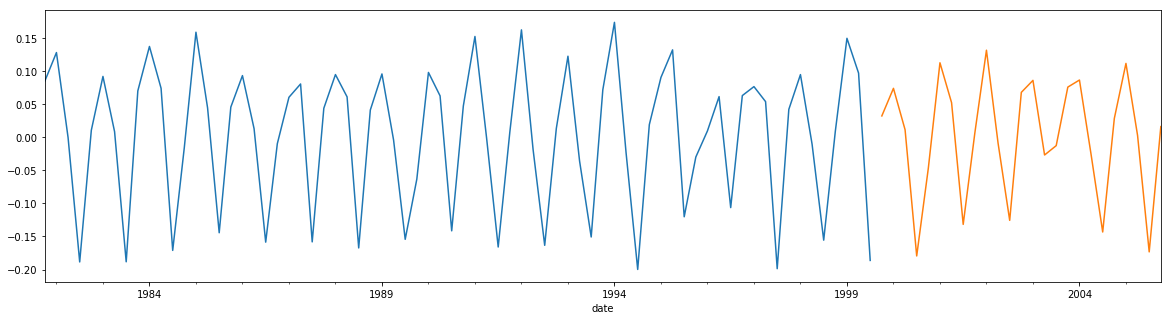

In [120]:
plt.figure(figsize=(20,5))

train = datasetLogScaleMinusMovingAverage[:int(0.75*(len(datasetLogScaleMinusMovingAverage)))]
valid = datasetLogScaleMinusMovingAverage[int(0.75*(len(datasetLogScaleMinusMovingAverage))):]

train['sales'].plot()
valid['sales'].plot()

In [121]:
datasetLogScaleMinusMovingAverage.head()

,sales
date,
1981-12-01,0.084631
1982-03-01,0.127811
1982-06-01,-0.000548
1982-09-01,-0.188486
1982-12-01,0.010459


In [122]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-213.203, BIC=-199.543, Fit time=0.331 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-113.322, BIC=-108.769, Fit time=0.155 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-111.472, BIC=-104.642, Fit time=0.109 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-145.507, BIC=-138.677, Fit time=0.162 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-154.547, BIC=-143.164, Fit time=0.255 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-227.689, BIC=-211.753, Fit time=0.385 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-226.831, BIC=-213.171, Fit time=0.314 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=-232.467, BIC=-214.254, Fit time=0.446 seconds
Fit ARIMA: order=(4, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=-241.554, BIC=-218.787, Fit time=0.587 seconds
Fit ARIMA: order=(3, 0, 4) seasonal_o

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(4, 0, 4),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

## Modelling

C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


Plotting AR model


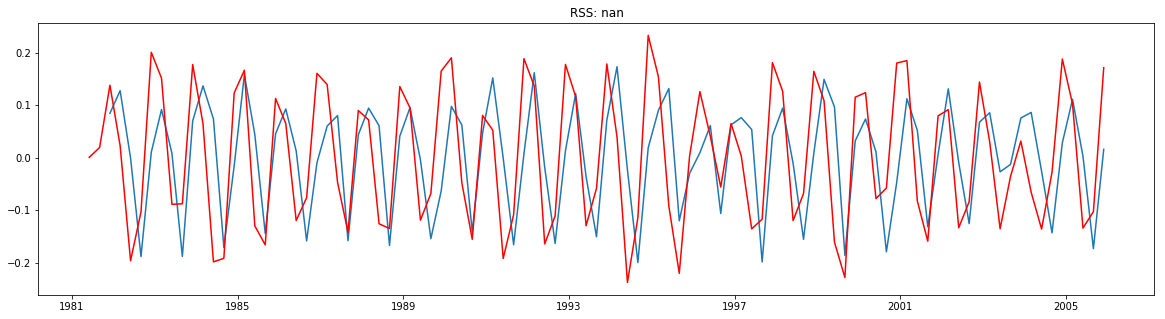

In [123]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,5))

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogScaleMinusMovingAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogScaleMinusMovingAverage["sales"])**2))
print('Plotting AR model')

In [124]:
# from statsmodels.tsa.arima_model import ARIMA

# plt.figure(figsize=(20,5))

# #MA MODEL
# model = ARIMA(indexedDataset_logScale, order=(2,1,2))
# results_MA = model.fit(disp=-1)
# plt.plot(decomposedLogData)
# plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-decomposedLogData["sales"])**2))
# print('Plotting AR model')

In [125]:
# #ARIMA

# plt.figure(figsize=(20,5))

# model = ARIMA(indexedDataset_logScale, order=(2,1,2))
# results_ARIMA = model.fit(disp=-1)
# plt.plot(decomposedLogData)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-decomposedLogData["sales"])**2))

In [141]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
1981-06-01    0.000633
1981-09-01    0.019391
1981-12-01    0.138170
1982-03-01    0.022814
1982-06-01   -0.196559
dtype: float64


In [142]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
1981-06-01    0.000633
1981-09-01    0.020024
1981-12-01    0.158195
1982-03-01    0.181008
1982-06-01   -0.015550
dtype: float64


In [143]:
predictions_ARIMA_log = pd.Series(decomposedLogData['sales'].ix[0], index=decomposedLogData.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
1981-06-01    0.000633
1981-09-01    0.020393
1981-12-01    0.158564
1982-03-01    0.181377
1982-06-01   -0.015181
dtype: float64

In [144]:
indexedDataset

,sales
date,
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7
...,...
2004-12-01,1018.7
2005-03-01,1112.5
2005-06-01,997.4


C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


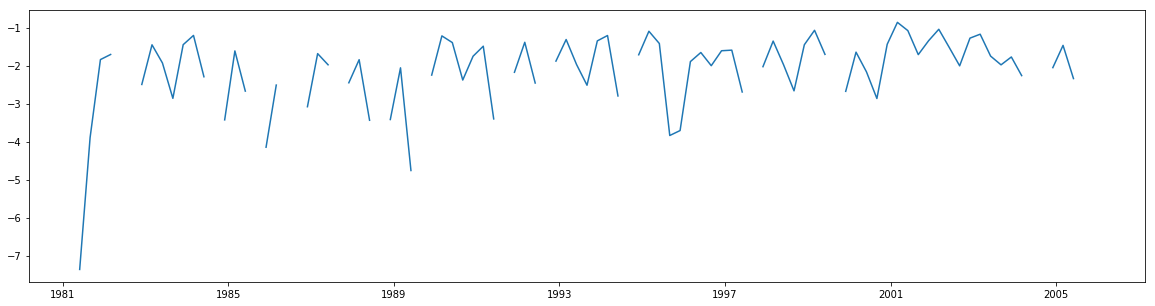

In [150]:
plt.figure(figsize=(20,5))

predictions_ARIMA = np.log(predictions_ARIMA_log)
#plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)